# Genomics Data Notebook 3: Visualizing Our Data


---

### Goal For This Notebook:

1 - Visualize the relationship between light exposure time and reads<br>

2 - Visualize the relationship between high and medium light<br>

3 - Draw conclusions from data visualizations<br>

---

### Table of Contents

1 - [Separating Our Data Tables](#section1)<br>

2 - [The Relationship between Light Exposure Time and Reads](#section2)<br>

3 - [The Relationship between High and Medium Light](#section3)<br>

4 - [Conclusions](#section4)<br>

---

<img src="images/algae.png" align="left">

For the final genomics data notebook, we will create visualizations of our data. In the previous notebooks, we have made our data more readable, normalized by read depth (.ie. by columns), and normalized by gene length (i.e. by row). The first of these steps made our data easier to read and therefore interpret. The last two accounted for the different scales of read depths under different conditions/samples and the various sequence lengths that different genes produce.

Let's import our libraries and our data from the file `rna_normalized.csv` located in the data folder. Make sure that the dataframe's values are normalized (are in proportions).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# EXERCISE

rna_data = pd.read_csv("data/rna_normalized.csv", index_col=0)

rna_data.head()

,0.5HL-0,0.5HL-1,0.5HL-2,0.5HL-3,12HL-0,12HL-1,12HL-2,12HL-3,1HL-0,1HL-1,...,1ML-2,1ML-3,3ML-0,3ML-1,3ML-2,3ML-3,6ML-0,6ML-1,6ML-2,6ML-3
tracking_id,,,,,,,,,,,,,,,,,,,,,
Cz01g00020,1.686260e-08,1.254196e-08,1.687844e-08,1.341901e-08,1.237321e-08,1.212767e-08,1.280309e-08,1.334510e-08,1.014449e-08,1.354261e-08,...,1.676205e-08,1.531761e-08,1.554627e-08,1.636461e-08,1.975660e-08,1.526856e-08,9.550060e-09,1.019831e-08,1.041653e-08,9.818118e-09
Cz01g00030,2.734191e-08,2.973011e-08,2.552330e-08,2.730249e-08,2.397698e-08,2.038243e-08,2.620839e-08,1.943855e-08,2.816385e-08,2.886237e-08,...,2.658599e-08,2.897355e-08,2.809642e-08,3.588067e-08,3.386484e-08,3.272879e-08,2.453101e-08,2.750621e-08,2.559786e-08,1.752520e-08
Cz01g00040,2.215351e-09,1.599276e-09,2.143101e-09,2.234822e-09,5.325634e-09,6.818193e-09,6.139395e-09,6.817658e-09,1.108374e-09,1.846015e-09,...,2.206993e-09,1.475641e-09,2.625392e-09,2.643992e-09,3.037394e-09,2.845531e-09,3.991581e-09,3.363181e-09,4.223697e-09,4.879230e-09
Cz01g00050,1.237266e-09,1.062894e-09,1.707279e-09,1.106725e-09,4.913113e-09,5.794190e-09,6.087923e-09,4.927324e-09,7.264047e-10,7.101226e-10,...,1.481354e-09,1.468541e-09,2.294168e-09,2.190650e-09,2.485212e-09,2.000645e-09,3.142370e-09,3.027538e-09,2.599626e-09,3.336775e-09
Cz01g00060,4.464009e-09,3.744567e-09,5.857437e-09,5.046740e-09,8.282577e-09,8.755179e-09,7.835027e-09,6.868910e-09,3.101962e-09,4.317607e-09,...,5.078557e-09,5.991317e-09,5.061666e-09,3.415215e-09,5.646848e-09,3.543387e-09,7.326148e-09,6.569471e-09,5.365565e-09,8.193182e-09


## 1. Separating Our Data Tables<a id ='section1'>

In order to create visualizations that represent our data well, it might be easier to separate our data into two tables -- one with the data under high light conditions and another with the data under medium light conditions.

Create separate tables for high light and medium light. To do this, type out the column labels that we would like to use in the ellipses (...). Also, be sure to put them in order of hours of light exposure and to keep only the conditions whose hours are found in both high light and medium light.

As a reference, we have printed out all the column labels.

In [5]:
rna_data.columns

Index(['0.5HL-0', '0.5HL-1', '0.5HL-2', '0.5HL-3', '12HL-0', '12HL-1',
       '12HL-2', '12HL-3', '1HL-0', '1HL-1', '1HL-2', '1HL-3', '3HL-0',
       '3HL-1', '3HL-2', '3HL-3', '6HL-0', '6HL-1', '6HL-2', '6HL-3',
       '0.5ML-0', '0.5ML-1', '0.5ML-2', '0.5ML-3', '0ML-0', '0ML-1', '0ML-2',
       '0ML-3', '12ML-0', '12ML-1', '12ML-2', '12ML-3', '1ML-0', '1ML-1',
       '1ML-2', '1ML-3', '3ML-0', '3ML-1', '3ML-2', '3ML-3', '6ML-0', '6ML-1',
       '6ML-2', '6ML-3'],
      dtype='object')

In [6]:
# EXERCISE

rna_HL = rna_data[['0.5HL-0', '0.5HL-1', '0.5HL-2', '0.5HL-3', 
        '1HL-0', '1HL-1', '1HL-2', '1HL-3', 
        '3HL-0', '3HL-1', '3HL-2', '3HL-3', 
        '6HL-0', '6HL-1', '6HL-2', '6HL-3',
        '12HL-0', '12HL-1', '12HL-2', '12HL-3']]

rna_ML = rna_data[['0.5ML-0', '0.5ML-1', '0.5ML-2','0.5ML-3',  
        '1ML-0', '1ML-1', '1ML-2', '1ML-3',
        '3ML-0', '3ML-1', '3ML-2', '3ML-3', 
        '6ML-0', '6ML-1', '6ML-2', '6ML-3',
        '12ML-0', '12ML-1', '12ML-2', '12ML-3']]

Now we can visualize our data more effectively. Let's first look at how reads change as light exposure times increase.

## 2. The Relationship between Light Exposure Time and Reads<a id='section2'>

Before we look at the relationship between light exposure time and reads, we need to consider what we should visualize! We could have light exposure times on the x-axis and reads on the y-axis, but what would our datapoints be?

We have reads for thousands of genes under various light exposure times, so let's just stick with looking at one. Like the previous two notebooks, we can look at gene `Cz01g00040`.

- Assign `light_times` to the light exposure times that are in both `rna_HL` and `rna_ML`.
    - There should be replications of the same time since we have 4 samples of each light exposure period.
- Assign `rna_HL_gene` to the data associated with `Cz01g00040` under high light exposures. Use `loc` to grab the appropriate row.
- Assign `rna_ML_gene` to the data associated with `Cz01g00040` under medium light exposures. Use `loc` to grab the appropriate row.

In [7]:
# EXERCISE

light_times = [0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 3, 3,3, 3, 6, 6, 6, 6, 12, 12, 12, 12]

rna_HL_gene = rna_HL.loc["Cz01g00040", :]
rna_ML_gene = rna_ML.loc["Cz01g00040", :]

The following cell generates a visualization that compares light exposure times to reads. It does not differentiate between the two different light intensities, but it is still a helpful intermediate step in analyzing our data.

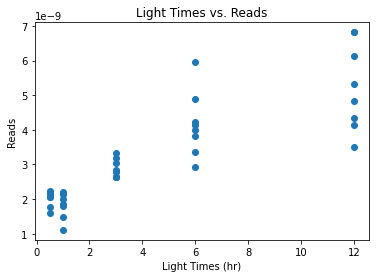

In [8]:
# EXAMPLE

light_times_twice = light_times + light_times
rna_gene = pd.concat([rna_HL_gene, rna_ML_gene])

plt.scatter(light_times_twice, rna_gene)
plt.title("Light Times vs. Reads")
plt.xlabel("Light Times (hr)")
plt.ylabel("Reads");

**Question 1** What relationship or patterns do you see? What do you think this means?

**Key: Although the ranges vary for each light time, overall there seems to be a relationship that the higher the light time, the higher the reads.**

Now that you have seen an example on how to create a scatter plot, it's your turn to create a scatter plot that visualizes the relationship between light exposure times and reads while separating the high light data from the medium light data.

To do so, use `light_times`, `rna_HL_gene`, and `rna_ML_gene`.

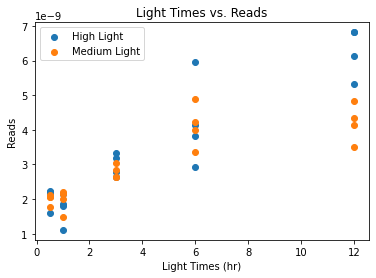

In [9]:
# EXERCISE

plt.scatter(light_times, rna_HL_gene)
plt.scatter(light_times, rna_ML_gene)
plt.title("Light Times vs. Reads")
plt.xlabel("Light Times (hr)")
plt.ylabel("Reads")
plt.legend(['High Light', 'Medium Light']);

**Question 2** Here you can see the difference between high light datapoints and medium light datapoints. Do you notice a different pattern between the two? What is different?

**Key: Similar pattern overall. However, for the medium light, the 12-hour light time data is not as high for high light.**

Let's create linear models for our high light data and medium light data. Recall from the energy dataset notebook 3, we can create our model using the function `polyfit()` from the numpy library.

We will also use the function `poly1d()` from the numpy library. This allows us to visualize the best-fit line in the format we are familiar with, y = mx + b, where m is the slope and b is the y-intercept. `poly1d()` also allows us to easily plot it over our scatter plot from before.

Let's first start by creating the models:

In [10]:
# EXERCISE

model_HL = np.polyfit(light_times, rna_HL_gene, 1)
model_function_HL = np.poly1d(model_HL)

model_ML = np.polyfit(light_times, rna_ML_gene, 1)
model_function_ML = np.poly1d(model_ML)

print(f"Linear function for high light data points: {model_function_HL}")
print(f"Linear function for medium light data points: {model_function_ML}")

Linear function for high light data points:  
3.894e-10 x + 1.697e-09
Linear function for medium light data points:  
2.104e-10 x + 2.068e-09


Let's now look at our scatter plot and line of best fit together! In the cell below, copy and paste your code for creating the scatter plot. On the line below, create the line of best fit.

When plotting the line of best fit, notice that you use the model function applied to the x data for your y values.

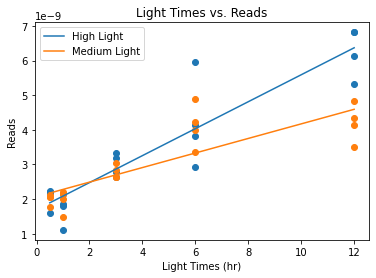

In [11]:
# EXERCISE - Create your scatter plot with the line of best fit

# Copy your code to create the scatter plot here:

plt.scatter(light_times, rna_HL_gene)
plt.scatter(light_times, rna_ML_gene)
plt.title("Light Times vs. Reads")
plt.xlabel("Light Times (hr)")
plt.ylabel("Reads")

# Create lines of best fit

plt.plot(light_times, model_function_HL(light_times))
plt.plot(light_times, model_function_ML(light_times))

# Create a legend
plt.legend(['High Light', 'Medium Light']);

We can see that the reads for gene `Cz01g00040` increase as the number of hours under light exposure increases. This denotes a positive correlation between the two. However, we notice that reads for the gene under high light increase more rapidly with time than reads for the gene under medium light.

Recall from energy data notebook 3 that we can quantify how good the line of best fit is by finding the R<sup>2</sup> (coefficient of determination) value. The closer R<sup>2</sup> is to 1, the better the fit. Let's find it using the function `r2_score()` from the `scikit-learn` library:

In [12]:
from sklearn.metrics import r2_score

r2_HL = r2_score(rna_HL_gene, model_function_HL(light_times))
r2_ML = r2_score(rna_ML_gene, model_function_ML(light_times))

print(f"R2 for high light linear model: {r2_HL}")
print(f"R2 for medium light linear model: {r2_ML}")

R2 for high light linear model: 0.8654396109746837
R2 for medium light linear model: 0.7174854708694778


Looking at your values for R<sup>2</sup>, do you think you the linear models are a good fit?

## 3. The Relationship between High and Medium Light<a id ='section3'>

In this section, let's look at the relationship between high light and medium light.

First, let's create a plot with `rna_HL_gene` on the x-axis and `rna_ML_gene` on the y-axis.

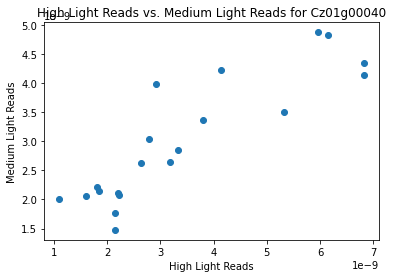

In [13]:
# EXERCISE

plt.scatter(rna_HL_gene, rna_ML_gene)
plt.title("High Light Reads vs. Medium Light Reads for Cz01g00040")
plt.xlabel("High Light Reads")
plt.ylabel("Medium Light Reads");

**Question 3** What relationship or patterns do you see? What does this mean?

**Key: Seems to be a positive correlation overall**

This scatter plot gives us some new information, but let's divide the datapoints into different colors representing the different light exposure times. Follow the format below.

- `orange`: datapoints that were measured after **0.5 Hours** of light exposure
    - These should be the first 4 rows `rna_HL_gene` and `rna_ML_gene` because there are 4 replications of 0.5HL and 4 replications of 0.5ML! Use slicing to take the *first 4 rows of a list* (you can look back at notebook 02 to see how to slice lists)
- `yellow`: datapoints that were measured after **1 Hour** of light exposure
    - These should be the *next* 4 rows of `rna_HL_gene` and `rna_ML_gene`.
- `green`: datapoints that were measured after **3 Hours** of light exposure
- `blue`: datapoints that were measured after **6 Hours** of light exposure
- `purple`: datapoints that were measured after **12 Hours** of light exposure

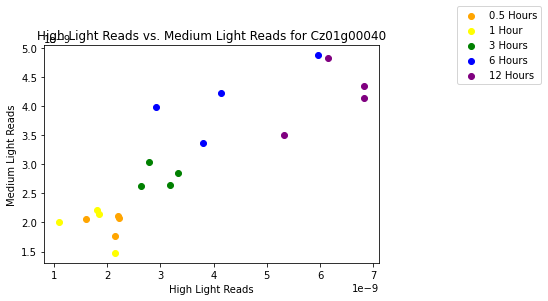

In [14]:
# EXERCISE

orange = plt.scatter(rna_HL_gene[0:4], rna_ML_gene[0:4], c="orange")
yellow = plt.scatter(rna_HL_gene[4:8], rna_ML_gene[4:8], c="yellow")
green = plt.scatter(rna_HL_gene[8:12], rna_ML_gene[8:12], c="green")
blue = plt.scatter(rna_HL_gene[12:16], rna_ML_gene[12:16], c="blue")
purple = plt.scatter(rna_HL_gene[16:20], rna_ML_gene[16:20], c="purple")

dots = [orange, yellow, green, blue, purple]
labels = ["0.5 Hours", "1 Hour", "3 Hours", "6 Hours", "12 Hours"]

plt.title("High Light Reads vs. Medium Light Reads for Cz01g00040")
plt.xlabel("High Light Reads")
plt.ylabel("Medium Light Reads")
plt.legend(dots, labels, loc="center right", bbox_to_anchor=(1.5, 1));

**Question 4** What are some observations you can make about this visualization? Are you surprised about the results or have you seen this relationship before?

**Key: Similar pattern to prevoius graph, but now we can see that with longer light times, the higher the reads for both high light and medium light.**

Below is a visualization found in the original scientific publication. You do not need to understand it completely, but we do want you to notice some interesting features of it. Although our axes are different, notice that there are similarities between our figure and the publication figure.

<img src="images/pca.png" width="450" align="left">

**Question 5** What similarities can you draw between our visualization and the original publication's visualization? List at least two things.

_Your answer here_

## 4. Conclusions<a id ='section4'>

Refer back to the two figures we created. The first one compared light exposure times to read values under different light intensities for the gene `Cz01g00040`. The second visualization once again looked at the gene `Cz01g00040`, but this time, it looked at the relationship between the two light intensities grouped by different light exposure times.

**Question 1** Now that you have seen two visualizations of the same data, what relationship(s) are you confident in?

_Your answer here_

**Question 2** What other data would you have liked to include if you were conducting this experiment? Would you have taken into account oxygen levels, temperature, etc?

_Your answer here_

**Question 3** Do you think you would have seen the same results if we had analyzed a gene other than `Cz01g00040`? Why or why not? If you have time, feel free to copy-and-paste the code with a different gene name to see whether the relationships stand for another gene.

_Your answer here_

Notebook developed by: Sharon Greenblum, Ciara Acosta, Kseniya Usovich, Alisa Bettale